In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/16692/OneDrive/Desktop/Movie-Genre/movie-genre-predictor/movies_final.csv')  


In [4]:
X_text = df['clean_overview']


In [5]:
print(type(X_text))
print(X_text.head())


<class 'pandas.core.series.Series'>
0    paraplegic marine dispatched moon pandora uniq...
1    captain long believed come life headed edge ea...
2    cryptic message past sends trail uncover sinis...
3    following death district attorney harvey batma...
4    john carter military captain inexplicably tran...
Name: clean_overview, dtype: object


In [6]:
X_text = X_text.fillna('')


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X_text)


In [15]:
import ast

def extract_genre_names(genre_str):
    try:
        return [g['name'] for g in ast.literal_eval(genre_str)]
    except:
        return []

df['genres'] = df['genres'].apply(extract_genre_names)


In [8]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['genres'])


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)


c:\Users\16692\anaconda3\envs\genre-predictor\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 14 is present in all training examples.
  warnings.warn(
c:\Users\16692\anaconda3\envs\genre-predictor\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 15 is present in all training examples.
  warnings.warn(


OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [12]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91       797
           1       0.99      1.00      1.00       954
           2       0.82      1.00      0.90       792
           3       0.75      0.34      0.47       332
           4       0.69      0.62      0.65       438
           5       0.71      0.67      0.69       486
           6       0.90      0.18      0.30       256
           7       1.00      0.01      0.01       141
           8       0.00      0.00      0.00       104
           9       0.88      0.09      0.16       167
          10       1.00      0.04      0.08       121
          11       0.78      0.13      0.22       275
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00        53
          14       1.00      1.00      1.00       961
          15       1.00      1.00      1.00       961
          16       0.70      0.96      0.81       646
          17       0.68    

c:\Users\16692\anaconda3\envs\genre-predictor\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\16692\anaconda3\envs\genre-predictor\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


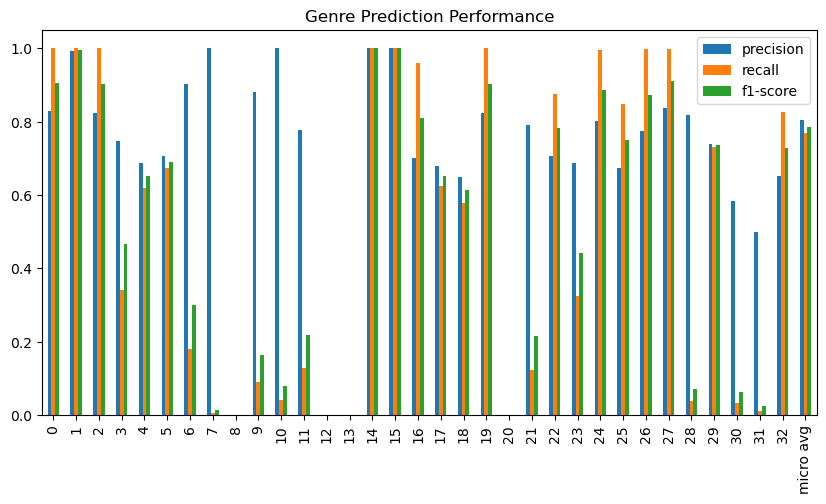

In [13]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,5))
plt.title("Genre Prediction Performance")
plt.show()


In [14]:
import joblib
joblib.dump(model, 'genre_predictor_model.pkl')


['genre_predictor_model.pkl']